<a href="https://colab.research.google.com/github/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/blob/main/ORGANIZAR_ESTE_Machine_Learning_NLP_Vectorization_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataframes library
!pip install pyspellchecker 
!pip install contractions
!pip install nltk --upgrade
!pip install emoji
import nltk
nltk.download("popular")
nltk.download('vader_lexicon') #sentiment analysis
nltk.download('twython') #twitter not necessary

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.5)


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

False

In [ ]:
import pandas as pd
import re


from nltk.tokenize.casual import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import ngrams, pos_tag
from ast import literal_eval



#Correcciones y emoji
import emoji
from textblob import TextBlob
from spellchecker import SpellChecker
import contractions
from multiprocessing import Pool

#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#Feature selection 
from sklearn.feature_selection import SelectKBest, chi2

#Classification
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

#Visualization and results
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from tabulate import tabulate
#knn
from sklearn import neighbors
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
raw_dataset_tweets = pd.read_csv('https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/labeled_data.csv?token=AGI3DY5JJD5B6YDVPN6RALS73X4VW', index_col=[0])
ds_alt_twitter = pd.read_csv('https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/preprocesado_hard.csv?token=ANLXPWJMEXACTZMMCGNJL6C74C6YU ', index_col=[0])
ds_alt_twitter = ds_alt_twitter.iloc[:,0]
ds_alt_twitter


0        ['trash', 'man', 'take', 'clean', 'hous', 'alw...
1        ['boy', 'dat', 'bad', 'place', 'coffin', 'hoe'...
2        ['dawg', 'confus', 'bitch', 'fuck', 'ever', 'c...
3                               ['tranni', 'like', 'look']
4        ['bitch', 'true', 'hear', 'told', 'faker', 'sh...
                               ...                        
24778    ['scriptur', 'trash', 'tl', 'right', 'lie', 'b...
24779    ['gone', 'redneck', 'babi', 'crazi', 'wrong', ...
24780    ['want', 'di', 'like', 'fuck', 'young', 'dat',...
24781              ['lie', 'bitch', 'tell', 'got', 'wild']
24782    ['coll', 'ruffl', 'tac', 'pink', 'yellow', 'or...
Name: tweet, Length: 24783, dtype: object

# Vectorization


In [ ]:
def identity_tokenizer(text):
    return text

In [ ]:
%%time
# TF-IDF
vectorizer = TfidfVectorizer(lowercase=False, max_features=10000, ngram_range=(1,4))    
vectors = vectorizer.fit_transform(ds_alt_twitter)

#We have to clean some variables, because we need storage in RAM later
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
vectors = None
denselist = dense.tolist()
dense = None
tweets_vectorization = pd.DataFrame(denselist, columns=feature_names)
denselist =None




CPU times: user 3min 1s, sys: 20.3 s, total: 3min 21s
Wall time: 3min 21s


In [ ]:
tweets_vectorization

,a1,a3,aa,aaron,ab,abil,abl,abo,absolut,abu,abus,accent,accept,accid,accident,accord,account,accur,accus,ace,acid,acknowledg,across,act,act hate,act need,act nigga,act ya,actin,action,activ,actor,actress,actual,actual face,actual fuck,actual realli,actual trash,ad,adam,...,yo like,yo main,yo might,yo momma,yo new,yo nigga,yo polli,yo real,yo see,yo sometim,yo trna,yoga,yokel,york,york yanke,yosef,you,young,young bitch,young got,young nigga,young porn,young tear,younger,youth,youtub,yr,yu,yuan,yuh,yung,yup,zebra,zero,zimmerman,zip,zombi,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.308487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [ ]:
class_label = raw_dataset_tweets.copy()
class_label = class_label['class']
class_label.reset_index(inplace = True, drop = True)

In [ ]:
%%time

n_tweets = tweets_vectorization.shape[0]
n_features = tweets_vectorization.shape[1]
n_features = int(n_features*0.30)

class_label = class_label.iloc[0:n_tweets]

#quitamos el 70% de las features, se supone que en función del target class_label
tweets_vectorization = SelectKBest(chi2, k=n_features).fit_transform(tweets_vectorization,class_label)
tweets_vectorization

df_tweets_vectorization_selected = pd.DataFrame(data=tweets_vectorization)
df_tweets_vectorization_selected['target']= class_label

CPU times: user 2.25 s, sys: 257 ms, total: 2.51 s
Wall time: 2 s


# Post-processing and Dataset configuration

Dataset options:
 - Dataset Hard:
 - Dataset Soft:

Post-Processing options:
 - Prop-hate:
 - POS Tagging
 - RT Count
 - Word Count


In [250]:
#@title Configuration input
use_PROP_hate = True #@param {type:"boolean"}
use_POS_taggin = True #@param {type:"boolean"}
use_RT_count = True #@param {type:"boolean"}
use_WORD_count = True #@param {type:"boolean"}

# Juntar los chunguis

url_soft_df = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/preprocesado_soft.csv?token=AHJ5UMFESTHGL4DK6Q7OIPC74DAU4'
url_hard_df = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/preprocesado_hard.csv?token=AHJ5UME4YXBZBT27XRCHZDC74DAUY'
url_raw_df = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/labeled_data.csv?token=AHJ5UMB663CGIFRDOABQILC74XP36'
ngram_url = 'https://raw.githubusercontent.com/manuvillalba-uclm/Natural_Lenguaje_Processing-ELM/main/refined_ngram_dict.csv?token=AHJ5UMBEPPGBHSVIT2JN3FS74W7UI'


ds_soft_prep = pd.read_csv(url_soft_df, index_col=[0])
ds_hard_prep = pd.read_csv(url_hard_df, index_col=[0])
ds_raw = pd.read_csv(url_raw_df, index_col=[0])
df_ngram = pd.read_csv(ngram_url)



ds_alt_twitter = ds_hard_prep.copy()


## N-grams PROP HATE
Used dataset: SOFT

In [ ]:
# ------- DATASET USADO --------
ds_selected_copy = ds_soft_prep['tweet'].apply(literal_eval)#reconvertir a listas la columna de tweets
# ------------------------------


In [ ]:
def setWeight(frase):
  fixed_frase = " ".join(frase) #Supongo que la ultima version del preprocesado también estara en vector de palabras
  found_prophate = 0
  for i in range(1,5):
    # Ejecutar la division en n-grams
    split_ngrams = ngrams(fixed_frase.split(), i)
    for gr in split_ngrams:
      posible_prophate = ' '.join(gr) #Convertimos el n-gram en frase
      ngram_search = df_ngram[df_ngram['ngram'] == posible_prophate]
      if len(ngram_search) > 0 : #Si ha encontrado alguna coincidencia, se sustituye el prophate
        aux_prophate = ngram_search['prophate'].item()
        if aux_prophate > found_prophate:
          found_prophate = aux_prophate #Nos quedamos con el mayor prophate
  return found_prophate

In [ ]:
if use_PROP_hate:
  ds_alt_twitter['prophate'] = ds_selected_copy.apply(setWeight)
  #print(ds_alt_twitter[ds_alt_twitter.prophate > 0].head(500).to_markdown())

## POS-Tagging


In [ ]:
# ------- DATASET USADO --------
ds_selected_copy = ds_soft_prep.copy()
# ------------------------------


In [ ]:
from collections import Counter

word_type_lis = [
'VERB',  #verbs (all tenses and modes)
'NOUN',  #nouns (common and proper)
'PRON',  #pronouns 
'ADJ',  #adjectives
'ADV',  #adverbs
'ADP',  #adpositions (prepositions and postpositions)
'CONJ',  #conjunctions
'DET',  #determiners
'NUM',  #cardinal numbers
'PRT',  #particles or other function words
'X',  #other: foreign words, typos, abbreviations
'.',  #punctuation
]

def posTagPrep(row):
  pos_phrase = nltk.pos_tag(literal_eval(row[0]), tagset='universal') #TAGSET UNIVERSAL???
  result = Counter(elem[1] for elem in pos_phrase)
  for type_w in word_type_lis:
    col_name = 'pos_' + type_w.lower()
    row[col_name] = result[type_w]
  return row

In [ ]:
%time
if use_POS_taggin:
  ds_pos_taggin = ds_selected_copy.apply(posTagPrep, axis=1)
  del ds_pos_taggin['tweet'] #drop repeated column
  ds_alt_twitter = pd.concat([ds_alt_twitter, ds_pos_taggin], axis=1)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 42.4 µs


## RT COUNT


In [ ]:
# ------- DATASET USADO --------
ds_selected_copy = ds_raw.copy()
# ------------------------------


In [ ]:
def countRT(phrase):
  return len(re.findall(r'RT', phrase))

if use_RT_count:
  ds_alt_twitter['rt_count'] = ds_selected_copy['tweet'].apply(countRT)


## WORD COUNT

In [ ]:
# ------- DATASET USADO --------
ds_selected_copy = ds_raw.copy()
# ------------------------------

In [ ]:
def countWord(phrase):
  return len(re.findall(r'\w+', phrase))

if use_WORD_count:
  ds_alt_twitter['word_count'] = ds_selected_copy['tweet'].apply(countWord)

# Final post-processing


In [ ]:
ds_alt_twitter

,tweet
0,"['trash', 'man', 'take', 'clean', 'hous', 'alw..."
1,"['boy', 'dat', 'bad', 'place', 'coffin', 'hoe'..."
2,"['dawg', 'confus', 'bitch', 'fuck', 'ever', 'c..."
3,"['tranni', 'like', 'look']"
4,"['bitch', 'true', 'hear', 'told', 'faker', 'sh..."
...,...
24778,"['scriptur', 'trash', 'tl', 'right', 'lie', 'b..."
24779,"['gone', 'redneck', 'babi', 'crazi', 'wrong', ..."
24780,"['want', 'di', 'like', 'fuck', 'young', 'dat',..."
24781,"['lie', 'bitch', 'tell', 'got', 'wild']"


# Sentiment

In [ ]:
def sentimentAnalyzer(tweet):
  sentiment_analyzer  = SentimentIntensityAnalyzer() 
  df_tweet_array = ' '.join(tweet)
  sentiment = sentiment_analyzer.polarity_scores(df_tweet_array)
  sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']
  return sentiment['compound']


In [ ]:
df_tweet_array = ds_alt_twitter['tweet'].apply(literal_eval)#reconvertir a listas la columna de tweets

if use_Sentiment_Analyzer:
  df_tweets_vectorization_selected['sentiment'] = df_tweet_array.apply(sentimentAnalyzer)

In [ ]:
ds_alt_twitter

,tweet
0,"['trash', 'man', 'take', 'clean', 'hous', 'alw..."
1,"['boy', 'dat', 'bad', 'place', 'coffin', 'hoe'..."
2,"['dawg', 'confus', 'bitch', 'fuck', 'ever', 'c..."
3,"['tranni', 'like', 'look']"
4,"['bitch', 'true', 'hear', 'told', 'faker', 'sh..."
...,...
24778,"['scriptur', 'trash', 'tl', 'right', 'lie', 'b..."
24779,"['gone', 'redneck', 'babi', 'crazi', 'wrong', ..."
24780,"['want', 'di', 'like', 'fuck', 'young', 'dat',..."
24781,"['lie', 'bitch', 'tell', 'got', 'wild']"


# Let's try resampling our Dataset

In [ ]:
df_tweets_vectorization_oversampling = df_tweets_vectorization_selected.copy()
df_tweets_vectorization_oversampling.groupby('target').count()
df_tweets_class0 = df_tweets_vectorization_oversampling.loc[df_tweets_vectorization_oversampling['target'] == 0]
df_tweets_class1 = df_tweets_vectorization_oversampling.loc[df_tweets_vectorization_oversampling['target'] == 1]
df_tweets_class2 = df_tweets_vectorization_oversampling.loc[df_tweets_vectorization_oversampling['target'] == 2]


In [ ]:

df_tweets_vectorization_oversampling = df_tweets_vectorization_oversampling.append(df_tweets_class0)
df_tweets_vectorization_oversampling = df_tweets_vectorization_oversampling.append(df_tweets_class0)



In [ ]:
df_tweets_vectorization_oversampling.reset_index(inplace=True, drop=True) 
df_tweets_vectorization_oversampling

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Classification

In [ ]:
tweets_classification = df_tweets_vectorization_oversampling.copy()

In [ ]:
model = BernoulliNB()

In [ ]:
train, test = train_test_split(tweets_classification, test_size=0.30)
train.reset_index(inplace = True)
test.reset_index(inplace = True)
print(train.shape)
print(test.shape)

(19350, 3002)
(8293, 3002)


In [ ]:
model.fit(train.loc[:, train.columns != 'target'], train['target'])
labels = model.predict(test.loc[:, test.columns != 'target'])

# Evaluation

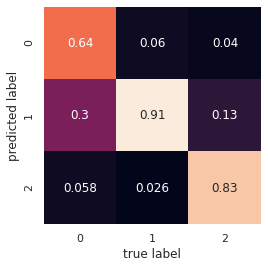

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(test['target'], labels, normalize='true')
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:

precision, recall, fscore, support = score(test['target'], labels)
print(tabulate({'Name': ['hate speech', 'offensive lenguage', 'neither'], 'Class': [0,1,2],'Precision':precision, 'Recall': recall, 'F-Score': fscore, 'Support': support} , headers=['Name','Class','Precision', 'Recall','F-Score','Support'], tablefmt='orgtbl'))

| Name               |   Class |   Precision |   Recall |   F-Score |   Support |
|--------------------+---------+-------------+----------+-----------+-----------|
| hate speech        |       0 |    0.677288 | 0.641145 |  0.658721 |      1293 |
| offensive lenguage |       1 |    0.90468  | 0.913799 |  0.909217 |      5754 |
| neither            |       2 |    0.820207 | 0.827448 |  0.823811 |      1246 |


We know that accuracy is not a correct metric to evaluate these types of problems, but we are just curious

In [ ]:
acc = accuracy_score(test['target'], labels)
print ('Acc', acc)

Acc 0.8583142409260822


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train_rf, test_rf = train_test_split(tweets_classification, test_size=0.30)
train_rf.reset_index(inplace = True)
test_rf.reset_index(inplace = True)


In [ ]:
%%time
model = RandomForestClassifier(n_estimators=1000)
model.fit(train_rf.loc[:, train.columns != 'target'], train_rf['target'])
ypred = model.predict(test_rf.loc[:, train.columns != 'target'])

CPU times: user 7min 17s, sys: 320 ms, total: 7min 17s
Wall time: 7min 17s


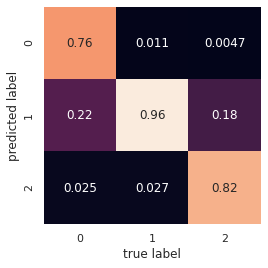

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(test_rf['target'], ypred, normalize='true')
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
precision, recall, fscore, support = score(test_rf['target'], ypred)
print(tabulate({'Name': ['hate speech', 'offensive lenguage', 'neither'], 'Class': [0,1,2],'Precision':precision, 'Recall': recall, 'F-Score': fscore, 'Support': support} , headers=['Name','Class','Precision', 'Recall','F-Score','Support'], tablefmt='orgtbl'))

| Name               |   Class |   Precision |   Recall |   F-Score |   Support |
|--------------------+---------+-------------+----------+-----------+-----------|
| hate speech        |       0 |    0.933333 | 0.758779 |  0.837053 |      1310 |
| offensive lenguage |       1 |    0.915903 | 0.961707 |  0.938246 |      5719 |
| neither            |       2 |    0.847097 | 0.81962  |  0.833132 |      1264 |


In [ ]:
acc = accuracy_score(test_rf['target'], ypred)
print ('Acc', acc)

Acc 0.9079946943205113
